In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")
df.shape

(10000, 10)

In [3]:
import math
N = df.shape[0]
d = df.shape[1]
ads_selected = []
number_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if number_of_selections[i]>0:
            average_reward = sum_of_rewards[i]/number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad]+=1
    reward = df.values[n,ad]
    sum_of_rewards[ad]+=reward
    total_reward+=reward

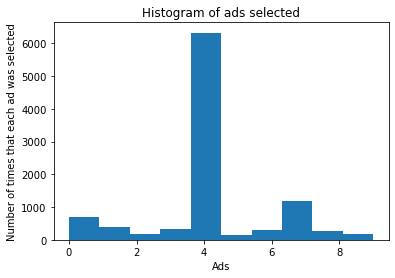

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times that each ad was selected")
plt.show()